In [27]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [28]:
x1=np.array([[1,2],[1.5,1.8],[5,8],[8,8],[1,.6],[9,11]])

In [39]:

x,y=make_blobs(n_samples=500,centers=4,cluster_std=0.6,random_state=0)
x=sorted(x , key=lambda k: [k[1], k[0]])
x=np.array(x)

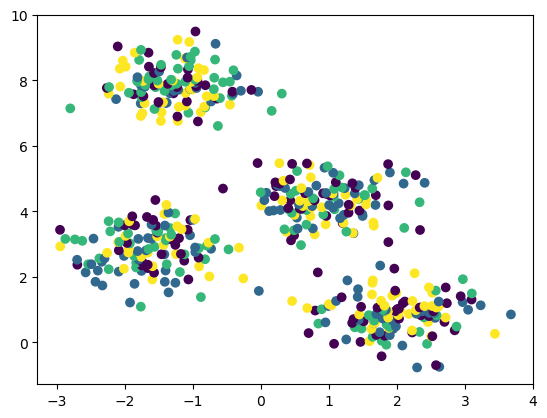

In [40]:
plt.scatter(x[:,0],x[:,1],c=y)
plt.show()

In [41]:
import sys

from sklearn.metrics import silhouette_score
class K_Means:

    def __init__(self,k,iter):
        self.k=k
        self.iter=iter
        self.means=[]
        self.clusters=[]

    def silhouette_score(self,data):
        a=[]      
        for i in range(self.k):
            a_i=[]
            for j in range(len(self.clusters[i])):
                distance=[]
                for k in range(len(self.clusters[i])):
                    if(j==k):
                        continue
                    distance.append((self.clusters[i][j][0]-self.clusters[i][k][0])**2+(self.clusters[i][j][1]-self.clusters[i][k][1])**2)
                a_i.append(np.mean(distance))
            a.append(a_i)
        b=[]
        s=[]
        for i in range(self.k):
            b_i=[]
            s_i=[]
            for j in range(len(self.clusters[i])):
                if(len(self.clusters[i])==1):
                    s_i.append(1)
                    continue
                min_distance=sys.maxsize
                for k in range(self.k):
                    if(k==i):
                        continue
                    distance=[]
                    if(j==i):
                        continue
                    for l in range(len(self.clusters[k])):
                        distance.append((self.clusters[i][j][0]-self.clusters[k][l][0])**2+(self.clusters[i][j][1]-self.clusters[k][l][1])**2)
                    if(min_distance>np.mean(distance)):
                        min_distance=np.mean(distance)
                b_i.append(min_distance)
                s_i.append((b_i[j]-a[i][j])/np.maximum(b_i[j],a[i][j]))
            b.append(b_i)
            s.append(np.mean(s_i))
        silhouette_score=np.mean(s)
        return silhouette_score
    
    def silhouette_fit(self,data):
        max_score=-1*sys.maxsize
        max_i=0
        for i in range(2,6):
            self.k=i
            self.fit(data)
            print("k=",self.k)
            cur_score=self.silhouette_score(data)
            print("cur_score=",cur_score)
            print(type(cur_score))
            if(cur_score>max_score):
                max_score=cur_score
                max_i=i
        self.k=max_i
        self.fit(data)
        return max_score

    def fit(self,data):
        self.means=[]
        for i in range(self.k):
            self.means.append(data[i])
        for i in range(self.iter):
            self.clusters=[]
            for j in range(self.k):
                self.clusters.append([])
            for point in data:
                temp=[]
                temp.append(point)
                self.clusters[self.predict(temp)[0]].append(point)
            for j in range(self.k):
                self.means[j]=np.sum(self.clusters[j],axis=0)/len(self.clusters[j])

    def predict(self,data):
        predictions=[]
        for point in data:
            min=(point[0]-self.means[0][0])**2+(point[1]-self.means[0][1])**2
            min_mean_id=0
            for i in range (1,self.k):
                distance=(point[0]-self.means[i][0])**2+(point[1]-self.means[i][1])**2        
                if(min>=distance):
                    min=distance
                    min_mean_id=i
            predictions.append(min_mean_id)
        return predictions

    def mean(self):
        return self.means

In [42]:
k_means=K_Means(4,10)

In [43]:
score=k_means.silhouette_fit(x)
"""k_means.fit(x)"""

k= 2
cur_score= 0.6461040074356932
<class 'numpy.float64'>
k= 3
cur_score= 0.8094953871484024
<class 'numpy.float64'>
k= 4
cur_score= 0.8718401219647678
<class 'numpy.float64'>
k= 5
cur_score= 0.7160675987313703
<class 'numpy.float64'>


'k_means.fit(x)'

In [44]:
k_means.fit(x)
score=k_means.silhouette_score(x)
print("score=",score)

score= 0.8718401219647678


In [45]:
np.mean(score)

0.8718401219647678

In [46]:
predictons=k_means.predict(x)

In [47]:
means=k_means.mean()
means

[array([-1.62397851,  2.84672953]),
 array([1.9896518 , 0.85486599]),
 array([0.94866739, 4.33099426]),
 array([-1.23719873,  7.85161617])]

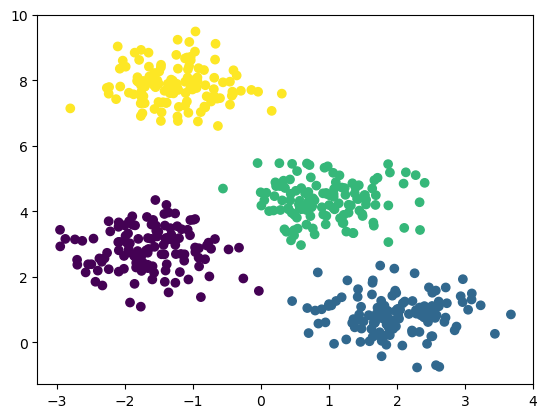

In [48]:
plt.scatter(x[:,0],x[:,1],c=predictons)
"""for i in range(4):
    plt.scatter(means[i][0],means[i][1])"""
plt.show()